# Feel Good Real Estate

Feel Good Real Estate want to make a prediction model on the prices of houses through some data with certain characteristics of the house and the neighbourhood where it is located, so they can give a first estimated price of the house without having to contact an appraiser.
We are going to work with 4 files provided by the real estate agency, 2 to carry out the train and the other two to carry out the prediction.

#### ID --> House identifier 
#### crim --> Crime rate per capita by city
#### zn --> Proportion of residential land zoned for lots larger than 25,000 sq. ft
#### indus --> Proportion of non-retail business acres by city
#### chas --> Charles River dummy variable (= 1 if the reach borders the river; 0 otherwise)
#### nox --> Concentration of nitrogen oxides (parts per 10 million)
#### rm --> Average number of rooms per dwelling
#### age --> Proportion of owner-occupied units built before 1940
#### dis --> Weighted average of distances to five Boston employment centres
#### rad --> Index of accessibility to radial roads
#### tax --> Tax on the total value of the property of 10,000USD
#### ptratio --> Pupil/teacher ratio per city
#### black --> 1000(Bk - 0.63)^2 where Bk is the proportion of people of colour per city
#### lstat --> lowest status of the population (percentage)
#### medv --> Average value of owner-occupied houses in 1000USD. This will be the target variable to be predicted

In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as msee
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import itertools
from scipy import stats

In [2]:
train1 = pd.read_csv("train_1.csv")
train2 = pd.read_csv("train_2.csv")
predict1 = pd.read_csv("predict_1.csv")
predict2 = pd.read_csv("predict_2.csv")


In [3]:
train1.head()

,ID,zn,chas,rm,dis,rad,tax,medv
0,1,18.0,0,6.575,4.0900,1,296,24.0
1,2,0.0,0,6.421,4.9671,2,242,21.6
2,4,0.0,0,6.998,6.0622,3,222,33.4
3,5,0.0,0,7.147,6.0622,3,222,36.2
4,7,12.5,0,6.012,5.5605,5,311,22.9


In [4]:
print("Data Types", "\n")
print(train1.dtypes,"\n")
print("Existence of nulls", "\n")
print(train1.isnull().sum(),"\n")
print("Statistical Indicators", "\n")
print(train1.describe(),"\n")
print("Unique Values", "\n")
print(train1.nunique(),"\n")
print("Existence of Duplicates", "\n")
print(train1.duplicated().any(),"\n")

Data Types 

ID        int64
zn      float64
chas      int64
rm      float64
dis     float64
rad       int64
tax       int64
medv    float64
dtype: object 

Existence of nulls 

ID      0
zn      0
chas    0
rm      0
dis     0
rad     0
tax     0
medv    0
dtype: int64 

Statistical Indicators 

               ID          zn        chas          rm         dis         rad  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean   250.951952   10.689189    0.060060    6.265619    3.709934    9.633634   
std    147.859438   22.674762    0.237956    0.703952    1.981123    8.742174   
min      1.000000    0.000000    0.000000    3.561000    1.129600    1.000000   
25%    123.000000    0.000000    0.000000    5.884000    2.122400    4.000000   
50%    244.000000    0.000000    0.000000    6.202000    3.092300    5.000000   
75%    377.000000   12.500000    0.000000    6.595000    5.116700   24.000000   
max    506.000000  100.000000    1.000000    8.725000 

In [5]:
train2.head()

,ID,crim,indus,nox,age,ptratio,black,lstat
0,1,0.00632,2.31,0.538,65.2,15.3,396.90,4.98
1,2,0.02731,7.07,0.469,78.9,17.8,396.90,9.14
2,4,0.03237,2.18,0.458,45.8,18.7,394.63,2.94
3,5,0.06905,2.18,0.458,54.2,18.7,396.90,5.33
4,7,0.08829,7.87,0.524,66.6,15.2,395.60,12.43


In [6]:
print("Data Types", "\n")
print(train2.dtypes,"\n")
print("Existence of nulls", "\n")
print(train2.isnull().sum(),"\n")
print("Statistical Indicators", "\n")
print(train2.describe(),"\n")
print("Unique Values", "\n")
print(train2.nunique(),"\n")
print("Existence of Duplicates", "\n")
print(train2.duplicated().any(),"\n")

Data Types 

ID           int64
crim       float64
indus      float64
nox        float64
age        float64
ptratio    float64
black      float64
lstat      float64
dtype: object 

Existence of nulls 

ID         0
crim       0
indus      0
nox        0
age        0
ptratio    0
black      0
lstat      0
dtype: int64 

Statistical Indicators 

               ID        crim       indus         nox         age     ptratio  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean   250.951952    3.360341   11.293483    0.557144   68.226426   18.448048   
std    147.859438    7.352272    6.998123    0.114955   28.133344    2.151821   
min      1.000000    0.006320    0.740000    0.385000    6.000000   12.600000   
25%    123.000000    0.078960    5.130000    0.453000   45.400000   17.400000   
50%    244.000000    0.261690    9.900000    0.538000   76.700000   19.000000   
75%    377.000000    3.678220   18.100000    0.631000   93.800000   20.200000   
max   

In [7]:
predict1.head()

,ID,zn,chas,rm,dis,rad,tax
0,3,0.0,0,7.185,4.9671,2,242
1,6,0.0,0,6.430,6.0622,3,222
2,8,12.5,0,6.172,5.9505,5,311
3,9,12.5,0,5.631,6.0821,5,311
4,10,12.5,0,6.004,6.5921,5,311


In [8]:
print("Data Types", "\n")
print(predict1.dtypes,"\n")
print("Existence of nulls", "\n")
print(predict1.isnull().sum(),"\n")
print("Statistical Indicators", "\n")
print(predict1.describe(),"\n")
print("Unique Values", "\n")
print(predict1.nunique(),"\n")
print("Existence of Duplicates", "\n")
print(predict1.duplicated().any(),"\n")

Data Types 

ID        int64
zn      float64
chas      int64
rm      float64
dis     float64
rad       int64
tax       int64
dtype: object 

Existence of nulls 

ID      0
zn      0
chas    0
rm      0
dis     0
rad     0
tax     0
dtype: int64 

Statistical Indicators 

               ID          zn        chas          rm         dis         rad  \
count  173.000000  173.000000  173.000000  173.000000  173.000000  173.000000   
mean   258.404624   12.661850    0.086705    6.321237    3.958865    9.387283   
std    143.289788   24.536277    0.282219    0.700621    2.324131    8.662621   
min      3.000000    0.000000    0.000000    4.138000    1.178100    1.000000   
25%    136.000000    0.000000    0.000000    5.895000    2.010700    4.000000   
50%    268.000000    0.000000    0.000000    6.223000    3.421100    5.000000   
75%    381.000000   20.000000    0.000000    6.674000    5.400700   24.000000   
max    505.000000   95.000000    1.000000    8.780000   12.126500   24.000000   

In [9]:
predict2.head()

,ID,crim,indus,nox,age,ptratio,black,lstat
0,3,0.02729,7.07,0.469,61.1,17.8,392.83,4.03
1,6,0.02985,2.18,0.458,58.7,18.7,394.12,5.21
2,8,0.14455,7.87,0.524,96.1,15.2,396.90,19.15
3,9,0.21124,7.87,0.524,100.0,15.2,386.63,29.93
4,10,0.17004,7.87,0.524,85.9,15.2,386.71,17.10


In [10]:
print("Data Types", "\n")
print(predict2.dtypes,"\n")
print("Existence of nulls", "\n")
print(predict2.isnull().sum(),"\n")
print("Statistical Indicators", "\n")
print(predict2.describe(),"\n")
print("Unique Values", "\n")
print(predict2.nunique(),"\n")
print("Existence of Duplicates", "\n")
print(predict2.duplicated().any(),"\n")

Data Types 

ID           int64
crim       float64
indus      float64
nox        float64
age        float64
ptratio    float64
black      float64
lstat      float64
dtype: object 

Existence of nulls 

ID         0
crim       0
indus      0
nox        0
age        0
ptratio    0
black      0
lstat      0
dtype: int64 

Statistical Indicators 

               ID        crim       indus         nox         age     ptratio  \
count  173.000000  173.000000  173.000000  173.000000  173.000000  173.000000   
mean   258.404624    4.100862   10.835145    0.549981   69.245665   18.469942   
std    143.289788   10.607761    6.596488    0.117826   28.248244    2.196196   
min      3.000000    0.013810    0.460000    0.392000    2.900000   12.600000   
25%    136.000000    0.082210    5.320000    0.447000   42.800000   17.000000   
50%    268.000000    0.251990    8.560000    0.538000   79.200000   19.100000   
75%    381.000000    3.673670   18.100000    0.624000   94.600000   20.200000   
max   

In [11]:
train = pd.merge(train1, train2,how='inner', on='ID')
train

,ID,zn,chas,rm,dis,rad,tax,medv,crim,indus,nox,age,ptratio,black,lstat
0,1,18.0,0,6.575,4.0900,1,296,24.0,0.00632,2.31,0.538,65.2,15.3,396.90,4.98
1,2,0.0,0,6.421,4.9671,2,242,21.6,0.02731,7.07,0.469,78.9,17.8,396.90,9.14
2,4,0.0,0,6.998,6.0622,3,222,33.4,0.03237,2.18,0.458,45.8,18.7,394.63,2.94
3,5,0.0,0,7.147,6.0622,3,222,36.2,0.06905,2.18,0.458,54.2,18.7,396.90,5.33
4,7,12.5,0,6.012,5.5605,5,311,22.9,0.08829,7.87,0.524,66.6,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.0,0,5.569,2.3999,6,391,17.5,0.17783,9.69,0.585,73.5,19.2,395.77,15.10
329,502,0.0,0,6.593,2.4786,1,273,22.4,0.06263,11.93,0.573,69.1,21.0,391.99,9.67
330,503,0.0,0,6.120,2.2875,1,273,20.6,0.04527,11.93,0.573,76.7,21.0,396.90,9.08
331,504,0.0,0,6.976,2.1675,1,273,23.9,0.06076,11.93,0.573,91.0,21.0,396.90,5.64


In [12]:
print("Data Types", "\n")
print(train.dtypes,"\n")
print("Existence of nulls", "\n")
print(train.isnull().sum(),"\n")
print("Statistical Indicators", "\n")
print(train.describe(),"\n")
print("Unique Values", "\n")
print(train.nunique(),"\n")
print("Existence of Duplicates", "\n")
print(train.duplicated().any(),"\n")

Data Types 

ID           int64
zn         float64
chas         int64
rm         float64
dis        float64
rad          int64
tax          int64
medv       float64
crim       float64
indus      float64
nox        float64
age        float64
ptratio    float64
black      float64
lstat      float64
dtype: object 

Existence of nulls 

ID         0
zn         0
chas       0
rm         0
dis        0
rad        0
tax        0
medv       0
crim       0
indus      0
nox        0
age        0
ptratio    0
black      0
lstat      0
dtype: int64 

Statistical Indicators 

               ID          zn        chas          rm         dis         rad  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean   250.951952   10.689189    0.060060    6.265619    3.709934    9.633634   
std    147.859438   22.674762    0.237956    0.703952    1.981123    8.742174   
min      1.000000    0.000000    0.000000    3.561000    1.129600    1.000000   
25%    123.000000    0.00

In [13]:
test = pd.merge(predict1, predict2, how='inner', on='ID')
test

,ID,zn,chas,rm,dis,rad,tax,crim,indus,nox,age,ptratio,black,lstat
0,3,0.0,0,7.185,4.9671,2,242,0.02729,7.07,0.469,61.1,17.8,392.83,4.03
1,6,0.0,0,6.430,6.0622,3,222,0.02985,2.18,0.458,58.7,18.7,394.12,5.21
2,8,12.5,0,6.172,5.9505,5,311,0.14455,7.87,0.524,96.1,15.2,396.90,19.15
3,9,12.5,0,5.631,6.0821,5,311,0.21124,7.87,0.524,100.0,15.2,386.63,29.93
4,10,12.5,0,6.004,6.5921,5,311,0.17004,7.87,0.524,85.9,15.2,386.71,17.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,496,0.0,0,5.670,2.7986,6,391,0.17899,9.69,0.585,28.8,19.2,393.29,17.60
169,497,0.0,0,5.390,2.7986,6,391,0.28960,9.69,0.585,72.9,19.2,396.90,21.14
170,499,0.0,0,6.019,2.4091,6,391,0.23912,9.69,0.585,65.3,19.2,396.90,12.92
171,501,0.0,0,6.027,2.4982,6,391,0.22438,9.69,0.585,79.7,19.2,396.90,14.33


In [14]:
print("Data Types", "\n")
print(test.dtypes,"\n")
print("Existence of nulls", "\n")
print(test.isnull().sum(),"\n")
print("Statistical Indicators", "\n")
print(test.describe(),"\n")
print("Unique Values", "\n")
print(test.nunique(),"\n")
print("Existence of Duplicates", "\n")
print(test.duplicated().any(),"\n")

Data Types 

ID           int64
zn         float64
chas         int64
rm         float64
dis        float64
rad          int64
tax          int64
crim       float64
indus      float64
nox        float64
age        float64
ptratio    float64
black      float64
lstat      float64
dtype: object 

Existence of nulls 

ID         0
zn         0
chas       0
rm         0
dis        0
rad        0
tax        0
crim       0
indus      0
nox        0
age        0
ptratio    0
black      0
lstat      0
dtype: int64 

Statistical Indicators 

               ID          zn        chas          rm         dis         rad  \
count  173.000000  173.000000  173.000000  173.000000  173.000000  173.000000   
mean   258.404624   12.661850    0.086705    6.321237    3.958865    9.387283   
std    143.289788   24.536277    0.282219    0.700621    2.324131    8.662621   
min      3.000000    0.000000    0.000000    4.138000    1.178100    1.000000   
25%    136.000000    0.000000    0.000000    5.895000    

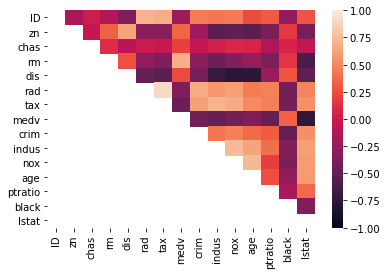

In [15]:
correlation_matrix = train.corr().where(~np.tril(np.ones(train.corr().shape)).astype(np.bool))
correlation_matrix
sns.heatmap(correlation_matrix, vmin=-1, vmax=1,)
plt.show()

## We can see that we have a highly correlated model, where 11 of the 14 columns we have available for prediction have a correlation higher than 0.5 with at least one of the other columns. Due to this we are going to select threshold from 0.75.

In [16]:
correlation_table = correlation_matrix.stack().to_frame().reset_index()
correlation_table['corr_columns'] = correlation_table['level_0'] + ' - ' + correlation_table['level_1']
correlation_table = correlation_table.drop(columns=['level_0', 'level_1'])
correlation_table['values'] = correlation_table[0]
correlation_table = correlation_table[['corr_columns', 'values']]
deltacorr = 0.75
filter_1 = correlation_table['values'] > deltacorr
filter_2 = correlation_table['values'] < -deltacorr

correlation_table_1 = correlation_table.where(filter_1 | filter_2).groupby('corr_columns').sum().sort_values(by='values', ascending=False)
correlation_table_1

,values
corr_columns,
rad - tax,0.903562
indus - nox,0.750087
dis - age,-0.764208
dis - nox,-0.769364


Age and nox, as both are correlated with dis, nox is correlated with indus and both have a 0.73 correlation between them.
tax, as it has a higher correlation with other columns than rad.

In [17]:
train = train.drop(columns = ["tax", "nox", "age", "ID"])
train.head()

,zn,chas,rm,dis,rad,medv,crim,indus,ptratio,black,lstat
0,18.0,0,6.575,4.0900,1,24.0,0.00632,2.31,15.3,396.90,4.98
1,0.0,0,6.421,4.9671,2,21.6,0.02731,7.07,17.8,396.90,9.14
2,0.0,0,6.998,6.0622,3,33.4,0.03237,2.18,18.7,394.63,2.94
3,0.0,0,7.147,6.0622,3,36.2,0.06905,2.18,18.7,396.90,5.33
4,12.5,0,6.012,5.5605,5,22.9,0.08829,7.87,15.2,395.60,12.43


# OUTLINERS 

#### For the elimination of outliners we will use the Z score method, which works by setting a threshold on the standard deviation. We test threshold value 3, because it is a commonly used value.

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
J:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
J:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
J:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

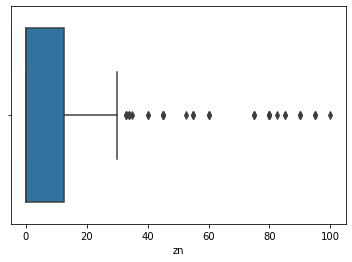

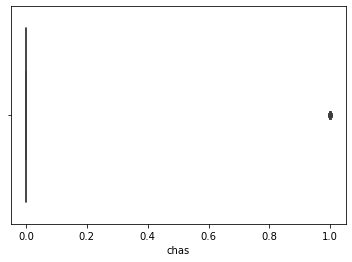

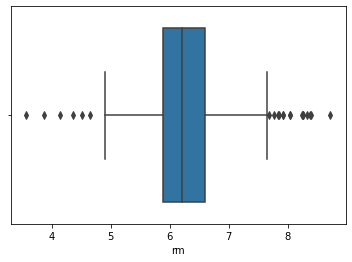

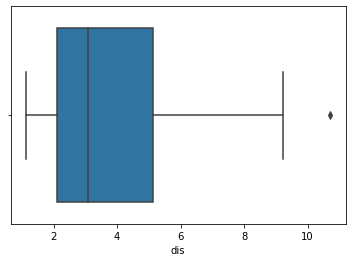

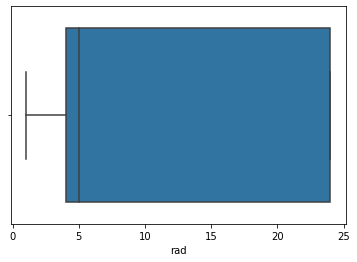

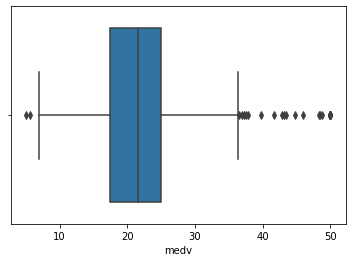

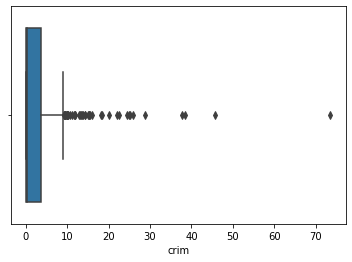

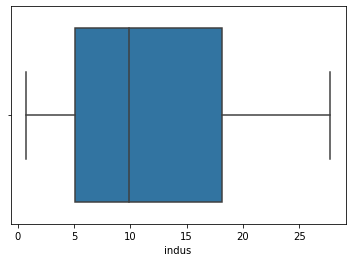

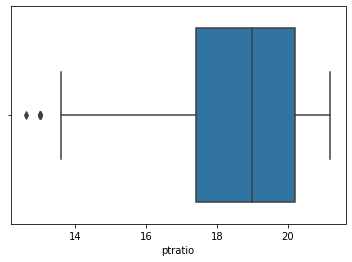

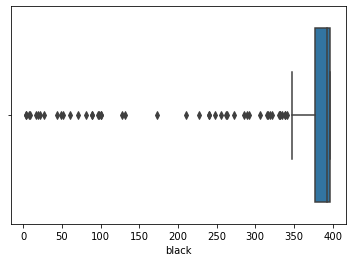

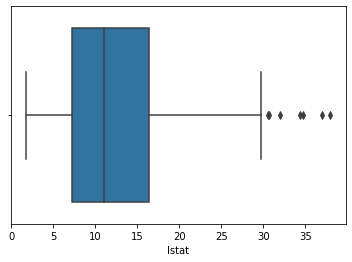

In [18]:
for col in train.columns:
    f, ax_new = plt.subplots(1)
    sns.boxplot(train[col], ax=ax_new)



In [19]:
z = np.abs(stats.zscore(train))
z

array([[0.32290583, 0.25278007, 0.44015381, ..., 1.46517068, 0.43298984,
        1.06777158],
       [0.47212294, 0.25278007, 0.22105954, ..., 0.30161579, 0.43298984,
        0.47829937],
       [0.47212294, 0.25278007, 1.04195169, ..., 0.11726397, 0.40673324,
        1.35683968],
       ...,
       [0.47212294, 0.25278007, 0.20717016, ..., 1.18773447, 0.43298984,
        0.48680137],
       [0.47212294, 0.25278007, 1.01065251, ..., 1.18773447, 0.43298984,
        0.97424954],
       [0.47212294, 0.25278007, 0.33521226, ..., 1.18773447, 0.43298984,
        0.65684143]])

In [20]:
trhold = 3

train_z = train[(z < trhold).all(axis=1)]
train_z.reset_index(drop=True)

,zn,chas,rm,dis,rad,medv,crim,indus,ptratio,black,lstat
0,18.0,0,6.575,4.0900,1,24.0,0.00632,2.31,15.3,396.90,4.98
1,0.0,0,6.421,4.9671,2,21.6,0.02731,7.07,17.8,396.90,9.14
2,0.0,0,6.998,6.0622,3,33.4,0.03237,2.18,18.7,394.63,2.94
3,0.0,0,7.147,6.0622,3,36.2,0.06905,2.18,18.7,396.90,5.33
4,12.5,0,6.012,5.5605,5,22.9,0.08829,7.87,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...
263,0.0,0,5.569,2.3999,6,17.5,0.17783,9.69,19.2,395.77,15.10
264,0.0,0,6.593,2.4786,1,22.4,0.06263,11.93,21.0,391.99,9.67
265,0.0,0,6.120,2.2875,1,20.6,0.04527,11.93,21.0,396.90,9.08
266,0.0,0,6.976,2.1675,1,23.9,0.06076,11.93,21.0,396.90,5.64


J:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
J:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
J:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
J:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

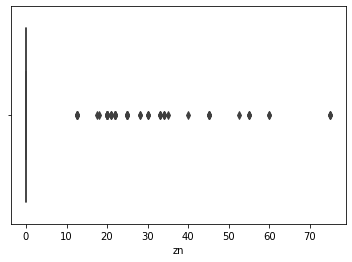

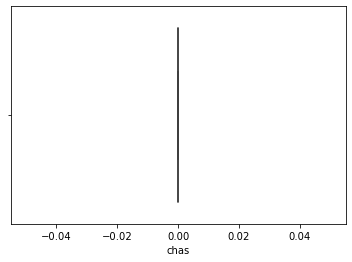

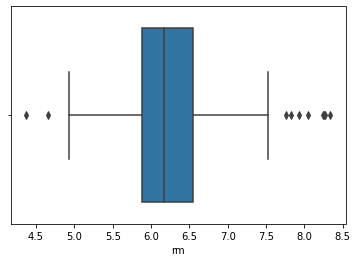

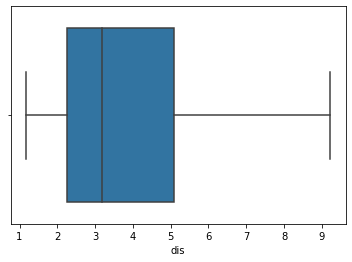

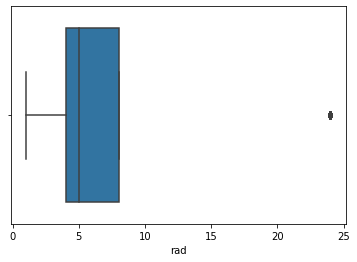

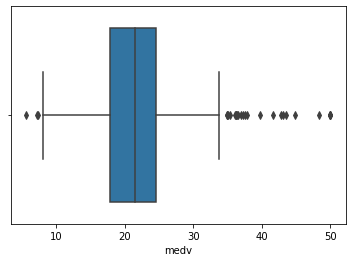

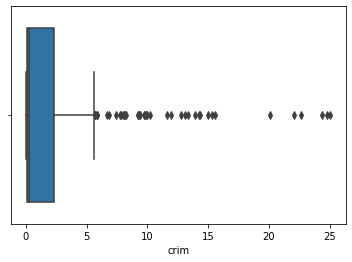

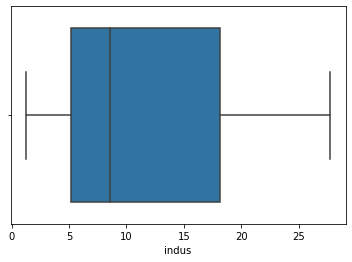

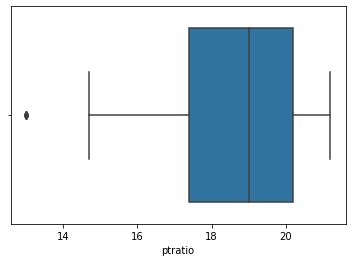

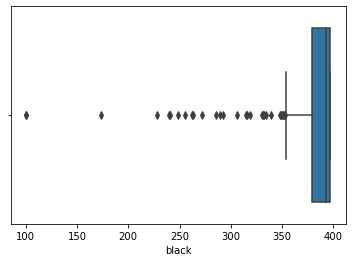

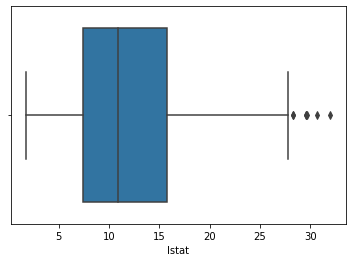

In [21]:
for col in train_z.columns:
    f, ax_new = plt.subplots(1)
    sns.boxplot(train_z[col], ax=ax_new)

### We can see a better distribution of the data

# MODEL PREPARATION

We are going to use a Random forest 

In [22]:
y = train.pop("medv")
y

0      24.0
1      21.6
2      33.4
3      36.2
4      22.9
       ... 
328    17.5
329    22.4
330    20.6
331    23.9
332    11.9
Name: medv, Length: 333, dtype: float64

In [23]:
sclr = StandardScaler()
features = sclr.fit_transform(train)

### Training the model

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=23)

In [25]:
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)

In [26]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [27]:
y_pred = rf.predict(X_test)

In [28]:
print("Score Train", "\n")
print(rf.score(X_train, y_train), "\n")
print("R2 Score", "\n")
print(r2_score(y_test, y_pred), "\n")
print("MSEE", "\n")
print(msee(y_test,y_pred), "\n")
print("MAE", "\n")
print(mae(y_test,y_pred), "\n")

Score Train 

0.9782740920703674 

R2 Score 

0.8270395442108696 

MSEE 

12.145088624999978 

MAE 

2.540659999999995 



### High values on Score Train: 0.98 and R2: 0.83, this means that it is a good prediction model for this data.

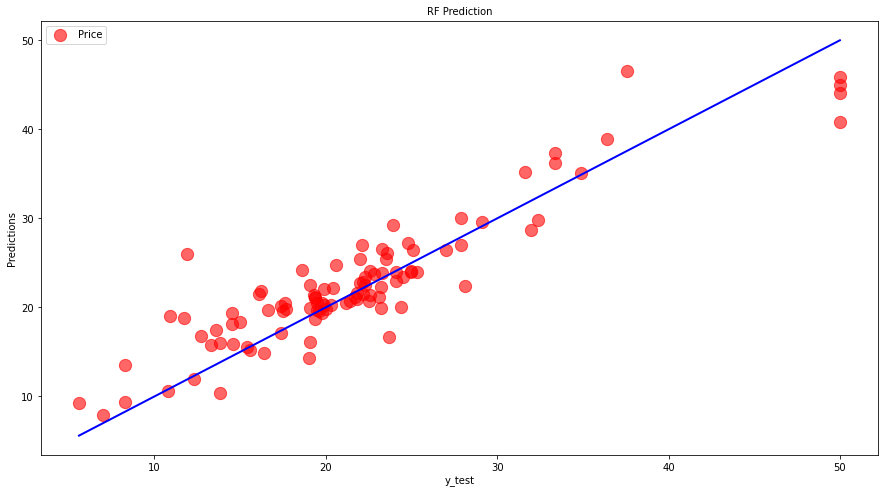

In [29]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,alpha=0.6, c='r', s=150, label = 'Price')
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.legend(loc='upper left')
plt.title('RF Prediction', fontsize=10)

m1=min(y_test)
m2=max(y_test)
plt.plot([m1,m2],[m1,m2],'b',linewidth=2)

# PREDICTION

In [30]:
test.head()

,ID,zn,chas,rm,dis,rad,tax,crim,indus,nox,age,ptratio,black,lstat
0,3,0.0,0,7.185,4.9671,2,242,0.02729,7.07,0.469,61.1,17.8,392.83,4.03
1,6,0.0,0,6.430,6.0622,3,222,0.02985,2.18,0.458,58.7,18.7,394.12,5.21
2,8,12.5,0,6.172,5.9505,5,311,0.14455,7.87,0.524,96.1,15.2,396.90,19.15
3,9,12.5,0,5.631,6.0821,5,311,0.21124,7.87,0.524,100.0,15.2,386.63,29.93
4,10,12.5,0,6.004,6.5921,5,311,0.17004,7.87,0.524,85.9,15.2,386.71,17.10


In [31]:
ID_test = test["ID"]



In [32]:
test = test.drop(columns = ["ID","tax", "nox", "age",])

In [33]:
pri_pre = rf.predict(test)
pri_pre

array([28.532 , 28.7045, 28.551 , 28.241 , 28.241 , 27.412 , 27.676 ,
       27.6745, 27.2445, 27.7485, 27.6675, 26.826 , 26.476 , 26.522 ,
       28.532 , 28.532 , 28.532 , 28.532 , 28.3355, 28.551 , 28.551 ,
       28.551 , 28.551 , 28.377 , 28.532 , 28.532 , 28.551 , 28.532 ,
       28.551 , 28.532 , 28.532 , 28.532 , 28.532 , 28.532 , 28.532 ,
       28.532 , 28.532 , 28.219 , 28.222 , 28.222 , 27.0905, 27.9275,
       27.8855, 27.8905, 28.276 , 25.913 , 26.1455, 26.163 , 26.3795,
       26.548 , 26.1395, 26.522 , 26.819 , 26.152 , 28.532 , 28.532 ,
       28.551 , 28.7635, 28.756 , 28.756 , 28.7635, 28.7235, 28.3355,
       27.8615, 28.222 , 28.222 , 28.222 , 28.532 , 28.532 , 28.532 ,
       27.9275, 28.2485, 27.901 , 27.918 , 28.551 , 28.551 , 28.551 ,
       28.241 , 28.241 , 28.551 , 28.551 , 28.551 , 28.551 , 27.7995,
       27.7675, 27.733 , 27.903 , 28.551 , 28.2675, 28.551 , 28.551 ,
       28.551 , 28.551 , 28.551 , 28.551 , 28.551 , 28.551 , 28.532 ,
       28.532 , 28.5

Text(0.5, 1.0, 'Prediction Estimated')

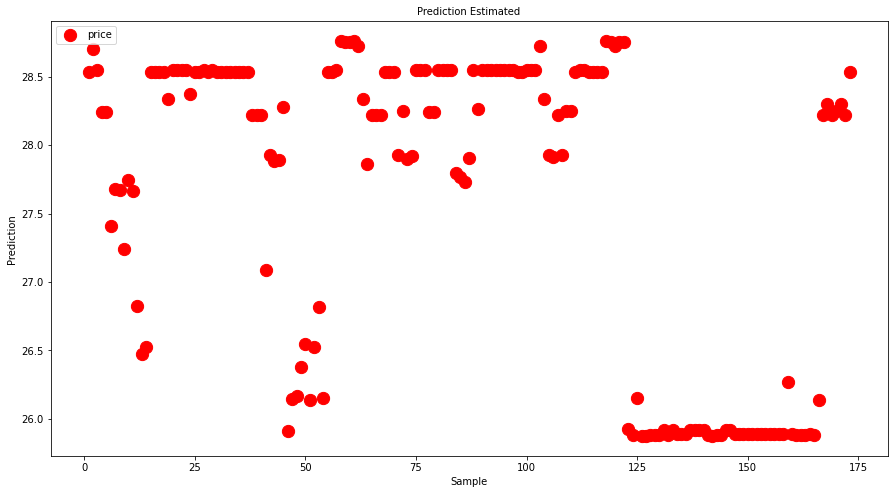

In [40]:
empt = []
for i in range(len(pri_pre)):
    empt.append(i+1)
    
plt.figure(figsize=(15,8))
plt.scatter(empt, pri_pre, c='r', s=150, label = 'price')
plt.xlabel('Sample')
plt.ylabel('Prediction')
plt.legend(loc='upper left')
plt.title('Prediction Estimated', fontsize=10)